In [38]:
import pandas as pd
import numpy as np

In [39]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/MyDrive/'Colab Notebooks'/'Reviews analysis'

file = "/content/drive/MyDrive/Colab Notebooks/Reviews analysis/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Copie de Reviews Sentiment Analysis.ipynb'   reviews.csv  'Reviews Sentiment Analysis.ipynb'


In [40]:
df = pd.read_csv(file +'reviews.csv')

In [41]:
df.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


 ### Data Preprocessing

We only keep the columns we need.

In [42]:
review_df = df[['reviews.title','reviews.text','reviews.rating','reviews.date']]
review_df.columns = ['title', 'text', 'rating', 'date']

In [43]:
review_df.dtypes

,0
title,object
text,object
rating,float64
date,object


We remove comments with unreadable characters

In [44]:
review_df = review_df[review_df["title"].str.contains("�")==False]
review_df = review_df.reset_index(drop=True)

We convert dates to the right format

In [45]:
review_df['date'] = pd.to_datetime(review_df['date'])
review_df['text'] = review_df['text'].astype(str)

In [46]:
review_df.dtypes

,0
title,object
text,object
rating,float64
date,"datetime64[ns, UTC]"


Let's take a look at a sample :

In [47]:
review_df.head(10)

,title,text,rating,date
0,Good location away from the crouds,Pleasant 10 min walk along the sea front to th...,4.0,2013-09-22 00:00:00+00:00
1,Great hotel with Jacuzzi bath!,Really lovely hotel. Stayed on the very top fl...,5.0,2015-04-03 00:00:00+00:00
2,Good location on the Lido.,We stayed here for four nights in October. The...,5.0,2013-10-27 00:00:00+00:00
3,Very nice hotel,We loved staying on the island of Lido! You ne...,5.0,2015-04-05 00:00:00+00:00
4,Lovely view out onto the lagoon. Excellent view.,Lovely view out onto the lagoon. Excellent vie...,4.0,2014-06-10 00:00:00+00:00
5,Lovely view out onto the lagoon. Excellent view.,ottimo soggiorno e ottima sistemazione nei gio...,4.0,2015-05-14 00:00:00+00:00
6,Ro og hygge,Lidoen er perfekt til et par dages ro og afsla...,4.0,2015-05-16 00:00:00+00:00
7,It was ok hotel is nice from in and out but room,It was ok hotel is nice from in and out but ro...,3.0,2015-08-02 00:00:00+00:00
8,Sehr angenehmes Hotel !,"Klasse Frhstck, freundliches und aufmerksames ...",4.0,2016-05-24 00:00:00+00:00
9,Tip top,"Bardzo sympatyczna obsuga, klimat hotelu. wiet...",4.0,2016-06-07 00:00:00+00:00


In [48]:
len(review_df)

33702

***

We take a smaller sample to reduce processing time.

In [49]:
nb = 2500

sample = review_df['text'].head(nb).tolist()

***

### Tokenization & sentiment analysis

We call the pretrained RoBERTa transformer to get a label about sentiment (positive, negative, neutral) as well as a confidence score.

In [50]:
from transformers import pipeline

model_path = "cardiffnlp/twitter-roberta-base-sentiment-latest"

model = pipeline(model = model_path, tokenizer = model_path)

review_list = sample

sentiments = model(review_list)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [51]:
df_sentiment = pd.DataFrame(sentiments, columns=['label', 'score'])
reviews_sentiment = pd.concat([review_df.head(nb), df_sentiment], axis=1)

***

## Word Frequency

We calculate word frequency in order to plot a word cloud. To do so we clean the comments usig different techniques such as punctuation removal, stripping, stopwords removal and lemmatization.

In [52]:
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
import urllib.request
from matplotlib import pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Removing punctuation

In [53]:
import string

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [54]:
reviews_sentiment['text'] = reviews_sentiment['text'].apply(remove_punctuation).str.lower()

Stripping white spaces

In [55]:
import gensim.parsing.preprocessing as gp

reviews_sentiment['text'] = reviews_sentiment['text'].map(gp.strip_multiple_whitespaces)

Removing stopwords

In [56]:
#Download and import list of stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords

stopwords_list = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
import spacy
load_en = spacy.load('en_core_web_sm')

Lemmatization process

In [58]:
def lemmatize_and_remove_stopwords(text):
    words = load_en(text)
    result = [lem_word.lemma_ for lem_word in words if not lem_word.is_stop]
    return result

In [59]:
reviews_sentiment['text'] = reviews_sentiment['text'].map(lemmatize_and_remove_stopwords)

We get the words frequency and plot the word cloud

In [60]:
fdist_list = [FreqDist(text) for text in reviews_sentiment['text']]

wfrequence = FreqDist()
for fdist in fdist_list:
    wfrequence.update(fdist)

most_common_words = wfrequence.most_common()

print(most_common_words)

[('room', 1837), ('hotel', 1536), ('stay', 1319), ('clean', 846), ('staff', 836), ('great', 733), ('good', 712), ('breakfast', 689), ('nice', 658), ('not', 511), ('friendly', 468), ('�', 433), ('bed', 425), ('night', 398), ('comfortable', 372), ('place', 339), ('time', 333), ('pool', 327), ('service', 314), ('restaurant', 304), ('area', 297), ('location', 286), ('desk', 284), ('like', 283), ('check', 272), ('helpful', 266), ('day', 238), ('walk', 220), ('go', 219), ('need', 208), ('close', 193), ('food', 193), ('work', 169), ('price', 166), ('get', 163), ('little', 161), ('bathroom', 159), ('excellent', 150), ('look', 149), ('lot', 148), ('find', 146), ('enjoy', 145), ('come', 142), ('door', 142), ('family', 139), ('recommend', 137), ('visit', 134), ('quiet', 133), ('ask', 132), ('free', 129), ('small', 127), ('2', 127), ('view', 125), ('want', 121), ('feel', 121), ('bad', 121), ('old', 120), ('hot', 120), ('thing', 119), ('love', 117), ('city', 117), ('pay', 116), ('experience', 116),

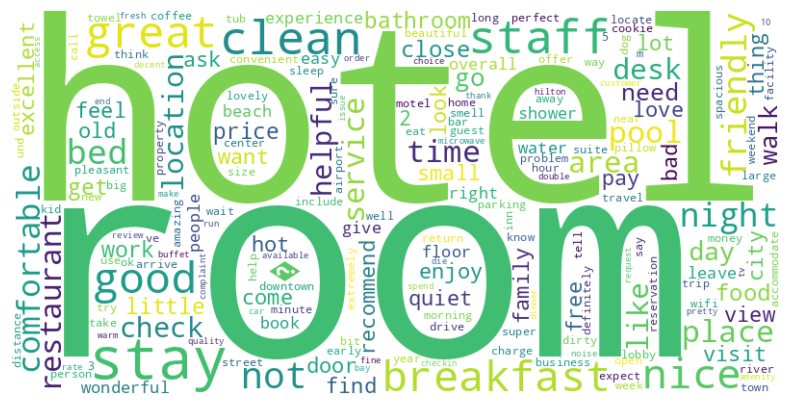

In [61]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

***

## Visualization

We can now display some quick visualizations to have a better overview of the reviews

In [62]:
import plotly.express as px

In [63]:
reviews_sentiment.head()

,title,text,rating,date,label,score
0,Good location away from the crouds,"[pleasant, 10, min, walk, sea, water, bus, res...",4.0,2013-09-22 00:00:00+00:00,positive,0.793499
1,Great hotel with Jacuzzi bath!,"[lovely, hotel, stay, floor, surprise, jacuzzi...",5.0,2015-04-03 00:00:00+00:00,positive,0.985383
2,Good location on the Lido.,"[stay, night, october, hotel, staff, welcome, ...",5.0,2013-10-27 00:00:00+00:00,positive,0.939237
3,Very nice hotel,"[love, stay, island, lido, need, water, venice...",5.0,2015-04-05 00:00:00+00:00,positive,0.980950
4,Lovely view out onto the lagoon. Excellent view.,"[lovely, view, lagoon, excellent, view, staff,...",4.0,2014-06-10 00:00:00+00:00,positive,0.986510


In [64]:
fig = px.pie(reviews_sentiment, names='label', color_discrete_sequence = px.colors.qualitative.Pastel, title='Repartition of the sentiment over the reviews')
fig.show()

In [65]:
fig = px.pie(reviews_sentiment, names='rating', color_discrete_sequence = px.colors.qualitative.Pastel, title='Repartition of the ratings over the reviews')
fig.show()